In [2]:
#pip install pyod
#pip install sklearn
#pip install tensorflow
import anomaly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
def get_data(f_name):
    
    if f_name == 'Deloitte_KX_OpenData_Contact List_03 Aug 2020.csv':
        df_raw = pd.read_csv(f_name, keep_default_na = False, na_values = 'NaN')
        x_cols = ['First Name', 'Last Name', 'Address Line 1']
        
        ##Test injection
        df_test = pd.DataFrame([['John', 'Carter', '1 Queen Street'], 
                     ['Johhnn', 'Carteerr', '1111111 Sort Of Wrong Address']], columns=x_cols)
        df_raw = pd.concat([df_raw, df_test])
        ##end of test injection
    
    elif f_name == 'aloi-unsupervised-ad.csv':
        #Harvard Dataverse>Unsupervised Anomaly Detection Dataverse>Unsupervised Anomaly Detection Benchmark>
        # aloi-unsupervised-ad.tab
        #https://doi.org/10.7910/DVN/OPQMVF/7VDJBV, Harvard Dataverse, V1, UNF:6:IkCoNEXH+d/YfqLkZQ0NVw== [fileUNF]

        df_raw = pd.read_csv(f_name, header = None)
        df_raw.rename({df_raw.columns[-1] : 'label'}, axis = 'columns', inplace = True)  
        df_raw.loc[df_raw.label == 'o', 'label'] = 1
        df_raw.loc[df_raw.label == 'n', 'label'] = 0

        df_raw['label'] = df_raw['label'].astype(bool)

        x_cols = df_raw.columns[0:-1]    

    elif f_name == 'SMSSpamCollection':
        import csv
        #http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
        df_raw = pd.read_csv(f_name, sep = '\t', quoting=csv.QUOTE_NONE, header = None)
        df_raw.rename({df_raw.columns[0] : 'label'}, axis = 'columns', inplace = True)  
        df_raw.loc[df_raw.label == 'spam', 'label'] = 1
        df_raw.loc[df_raw.label == 'ham', 'label'] = 0

        df_raw['label'] = df_raw['label'].astype(bool)

        x_cols = df_raw.columns[1:]
    
    elif f_name == 'generate data':
        #generated data
        from pyod.utils.data import generate_data
        X_train, _, y_train, _ = generate_data(n_train=10000,
                                               n_test=0,
                                               n_features=20,
                                               contamination=0.02,
                                               behaviour ='new',
                                               random_state=84)
        df_raw = pd.DataFrame(X_train)
        df_raw['label'] = y_train.astype(bool)
        x_cols = df_raw.columns[0:-1]
        
    elif f_name == 'generate clusters':
        #generated clusters
        from pyod.utils.data import  generate_data_clusters
        X_train, _, y_train, _ =  generate_data_clusters(n_train=10000,
                                                         n_clusters=15,
                                                         n_test=10,
                                                         n_features=20,
                                                         size ='different',
                                                         density = 'different',
                                                         return_in_clusters =False,
                                                         contamination=0.01,
                                                         random_state=126)
        df_raw = pd.DataFrame(X_train)
        df_raw['label'] = y_train.astype(bool)
        x_cols = df_raw.columns[0:-1]
        
    return df_raw, x_cols

In [4]:
#df_raw, x_cols = get_data('Deloitte_KX_OpenData_Contact List_03 Aug 2020.csv')
#df_raw, x_cols = get_data('aloi-unsupervised-ad.csv')
df_raw, x_cols = get_data('SMSSpamCollection')
#df_raw, x_cols = get_data('generate data')
#df_raw, x_cols = get_data('generate clusters')

random_state = np.random.RandomState(42)

df = df_raw[x_cols].sample(frac=1)

anom = anomaly.Anomaly()

if df.select_dtypes(include=[object]).shape[1] > 0: #has text values
    x, y = anom.text_process(df) #process text
    print(f'shape = {x.shape}')
    score_by_aom, score_by_moa, score_by_max, score_by_avg, all_scores, all_scores_norm \
                    = anom.fit(x, quick_methods = True, slow_methods= False, nn_methods = False, 
                               random_state = random_state, verbose = 0)
else:
    x = df.to_numpy()
    print(f'shape = {x.shape}')
    score_by_aom, score_by_moa, score_by_max, score_by_avg, all_scores, all_scores_norm \
                    = anom.fit(x, quick_methods = True, slow_methods= True, nn_methods = False, 
                               use_score_rank = True,
                               random_state = random_state, verbose = 0)


2020-11-03 09:46:40+13:00 : num_col=1, len_col=160
shape = (5574, 1, 160)
2020-11-03 09:46:41+13:00 : zero columns shrinked
2020-11-03 09:46:41+13:00 : used MaxAbsScaler() data scaler
2020-11-03 09:46:41+13:00 : n_rows = 5574, n_features = 160
2020-11-03 09:46:41+13:00 : 1 - fitting PCA_randomized
2020-11-03 09:46:41+13:00 : Base detector 1/15 is fitted for prediction
2020-11-03 09:46:41+13:00 : 2 - fitting PCA_full
2020-11-03 09:46:41+13:00 : Base detector 2/15 is fitted for prediction
2020-11-03 09:46:41+13:00 : 3 - fitting COPOD
2020-11-03 09:46:42+13:00 : Base detector 3/15 is fitted for prediction
2020-11-03 09:46:42+13:00 : 4 - fitting HBOS
2020-11-03 09:46:45+13:00 : Base detector 4/15 is fitted for prediction
2020-11-03 09:46:45+13:00 : 5 - fitting HBOS_200
2020-11-03 09:46:45+13:00 : Base detector 5/15 is fitted for prediction
2020-11-03 09:46:45+13:00 : 6 - fitting HBOS_300
2020-11-03 09:46:45+13:00 : Base detector 6/15 is fitted for prediction
2020-11-03 09:46:45+13:00 : 7 -

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


2020-11-03 09:46:58+13:00 : Base detector 13/15 is fitted for prediction
2020-11-03 09:46:58+13:00 : 14 - fitting CBLOF_24


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


2020-11-03 09:46:59+13:00 : Base detector 14/15 is fitted for prediction
2020-11-03 09:46:59+13:00 : 15 - fitting CBLOF_32


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


2020-11-03 09:47:02+13:00 : Base detector 15/15 is fitted for prediction
2020-11-03 09:47:02+13:00 : total scores = 15


Text(0, 0.5, 'number of messages')

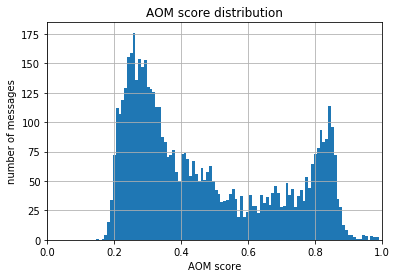

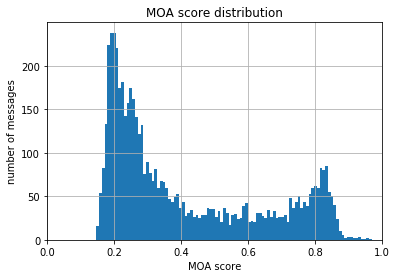

In [5]:
df['aom_score'] = score_by_aom
df['moa_score'] = score_by_moa
df['aommoa_score'] = np.mean([score_by_aom, score_by_moa], axis=0)

df['max_score'] = score_by_max
df['avg_score'] = score_by_avg      

    
for i in range(1, all_scores_norm.shape[1]+1):
    df['score_'+str(i)] = all_scores_norm[:, i-1]

df.hist(column = 'aom_score', bins = 100)[0][0].set_xlim((0,1))
plt.title ('AOM score distribution')
plt.xlabel ('AOM score')
plt.ylabel ('number of messages')
df.hist(column = 'moa_score', bins = 100)[0][0].set_xlim((0,1))
plt.title ('MOA score distribution')
plt.xlabel ('MOA score')
plt.ylabel ('number of messages')

In [10]:
if 'label' in df_raw.columns:
    from sklearn.metrics import roc_auc_score
    df['label']=df_raw['label']
    cnt = sum(df['label'] == 1) 
    print(f'true number of outliers = {cnt}')
else:
    cnt = 100
#pd.set_option('display.max_rows', cnt)
df.sort_values('aom_score', ascending=False)[0:cnt]

true number of outliers = 747


,1,aom_score,moa_score,aommoa_score,max_score,avg_score,score_1,score_2,score_3,score_4,...,score_7,score_8,score_9,score_10,score_11,score_12,score_13,score_14,score_15,label
5268,HI DARLIN ITS KATE ARE U UP FOR DOIN SOMETHIN ...,0.990593,0.925873,0.958233,1.000000,0.901254,0.962374,0.962374,0.847536,0.861382,...,0.660492,1.000000,0.833931,0.945097,0.934510,0.943688,0.939145,0.971081,0.926791,False
4911,WE REGRET TO INFORM U THAT THE NHS HAS MADE A ...,0.987843,0.969894,0.978869,1.000000,0.951471,1.000000,1.000000,1.000000,0.975686,...,0.797239,0.901576,0.967347,0.980612,0.933962,0.997090,0.933997,0.930813,0.952197,False
4318,HIYA STU WOT U UP 2.IM IN SO MUCH TRUBLE AT HO...,0.979031,0.934387,0.956709,1.000000,0.942434,0.980030,0.980030,0.927824,0.868164,...,1.000000,0.958678,0.790808,0.954269,0.948922,0.962761,0.997241,1.000000,0.997386,False
1407,"URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD...",0.975952,0.921342,0.948647,1.000000,0.903101,0.931399,0.931399,0.905190,1.000000,...,0.639540,0.934901,0.853931,0.915844,0.924932,0.975194,0.855454,0.846306,0.889103,True
2171,"""CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...",0.971946,0.938945,0.955445,1.000000,0.913102,0.957886,0.957886,0.923662,0.929896,...,0.577314,0.740284,0.825398,0.989076,0.942582,0.959181,0.963276,0.976628,0.953466,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,Boy; I love u Grl: Hogolo Boy: gold chain kods...,0.803254,0.770592,0.786923,0.857839,0.733059,0.773920,0.773920,0.747940,0.781410,...,0.597270,0.670428,0.496035,0.769440,0.857839,0.801288,0.782428,0.795363,0.799849,False
4460,Welcome to UK-mobile-date this msg is FREE giv...,0.803035,0.764159,0.783597,0.850753,0.755202,0.819311,0.819311,0.754983,0.737276,...,0.700042,0.656053,0.640490,0.811481,0.813672,0.850753,0.800220,0.800226,0.836243,True
2053,Call 09094100151 to use ur mins! Calls cast 10...,0.803028,0.763564,0.783296,0.814061,0.731323,0.814061,0.814061,0.752374,0.791995,...,0.510178,0.527082,0.622819,0.808502,0.779672,0.812774,0.746322,0.765760,0.770827,True
1487,Hello lover! How goes that new job? Are you th...,0.802976,0.776316,0.789646,0.888975,0.741658,0.760614,0.760614,0.725043,0.722945,...,0.622421,0.553700,0.602743,0.831061,0.839369,0.844516,0.880961,0.879195,0.888975,False


label 1 cnt = 747
label 0 cnt = 4827


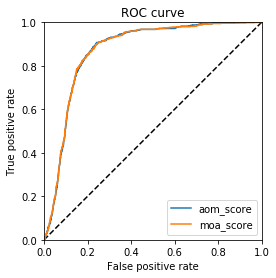

aom_score
324
roc_auc=0.8712022317569428
moa_score
330
roc_auc=0.8713117784306205
aommoa_score
326
roc_auc=0.8714424024389803
max_score
307
roc_auc=0.8595259430096603
avg_score
335
roc_auc=0.8758306480531615
score_1
324
roc_auc=0.8664581674533226
score_2
324
roc_auc=0.8664581674533226
score_3
331
roc_auc=0.8738832132618589
score_4
356
roc_auc=0.8893220835832799
score_5
407
roc_auc=0.9135366131330098
score_6
409
roc_auc=0.9140507891659171
score_7
290
roc_auc=0.8333894933369277
score_8
318
roc_auc=0.8504529824289908
score_9
303
roc_auc=0.8421582192314593
score_10
329
roc_auc=0.8716933891217101
score_11
327
roc_auc=0.8707216130595166
score_12
336
roc_auc=0.8716517891190478
score_13
296
roc_auc=0.8565864868215352
score_14
302
roc_auc=0.8606763217499512
score_15
306
roc_auc=0.8611572177807286


In [9]:
if 'label' in df_raw.columns:
    %matplotlib inline

    df['label']=df_raw['label']
    cnt = sum(df['label'] == 1) 
    print(f'label 1 cnt = {cnt}')
    print(f'label 0 cnt = {sum(df["label"] == 0)}')
    
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    plt.plot([0, 1], [0, 1], 'k--')
    fpr, tpr, _ = metrics.roc_curve(df.label, df['aom_score'])
    plt.plot(fpr, tpr, label='aom_score')
    fpr, tpr, _ = metrics.roc_curve(df.label, df['moa_score'])
    plt.plot(fpr, tpr, label='moa_score')
    
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    plt.show()

    for col in df.columns: 
        if 'score' in str(col):
            print(col)
            print(sum(df.sort_values(col, ascending=False)[0:cnt].label==1))
            print(f'roc_auc={roc_auc_score(df.label, df[col])}')
